# QCTO - Workplace Module

### Project Title: Please Insert your Project Title Here
#### Done By: Name and Surname

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

The insurance industry in Africa presents unique challenges. Although the continent is home to 17% of the global population, it accounts for only about 1% of insured catastrophe losses worldwide, highlighting a significant gap in insurance coverage and market penetration. In 2017, the total value of insurance premiums in Africa was estimated at $45 billion, but affordability, limited insurance knowledge, and high unemployment remain critical barriers.

This project uses an insurance claims dataset sourced from GitHub. The dataset captures detailed information about policies, insured individuals, vehicles, and reported claims, including whether a claim was fraudulent.

The main goals of the project are:

To apply the data science life cycle — from collection and cleaning to analysis and communication of findings.

To explore the insurance claims dataset to uncover insights about policyholders, claims behavior, and potential fraud.

To prepare the dataset for downstream analysis (statistical testing, modeling, or visualization).

This work is significant because clean, structured insurance data can help companies reduce fraud, improve risk management, generate actionable insights, and enhance customer experiences.

Trello board: https://trello.com/b/Lvw7kzDk/workplace-project

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
# Data manipulation
import pandas as pd
import numpy as np  

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  

# Data preprocessing & modeling (if needed later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

The dataset was sourced from GitHub (insurance_claims_raw.xlsx) and later exported into .csv format for easier analysis. GitHub was chosen for its accessibility, version control, and collaboration features. A manual data-cleaning step was performed in Excel before importing the dataset into this notebook.

Dataset Overview:

Size: Thousands of insurance policy records (rows).

Features: Mix of categorical (e.g., vehicle make, occupation, education level), numerical (e.g., policy premium, deductible, umbrella limit), and binary outcomes (e.g., fraud reported: Y/N).

Domain relevance: These features help insurers assess risk, detect fraud, and optimize marketing.

Key columns from the data dictionary:

policy_bind_date: Start date of the insurance policy.

policy_annual_premium: Yearly premium amount.

umbrella_limit: Extra insurance coverage limit.

auto_make, auto_model: Vehicle details.

insured_education_level, insured_occupation: Policyholder demographics.

fraud_reported: Whether the claim was fraudulent (Y/N).

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
# Load the dataset
df = pd.read_csv("insurance_claims.csv")

# Display first five rows
df.head()


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [7]:
# Basic cleaning specific to this dataset
# -------------------------

# Check for missing values
df.isnull().sum()

# Summary statistics to identify outliers
df.describe()

# Drop duplicates
df = df.drop_duplicates()

# Drop the entirely-missing column if present
if "_c39" in df.columns and df["_c39"].isna().all():
    df = df.drop(columns=["_c39"])

# Make sure the target is treated consistently
target_col = "fraud_reported"
if target_col in df.columns:
    df[target_col] = df[target_col].astype(str)



---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


Shape: (1000, 39)

Dtypes:
 months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
author

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

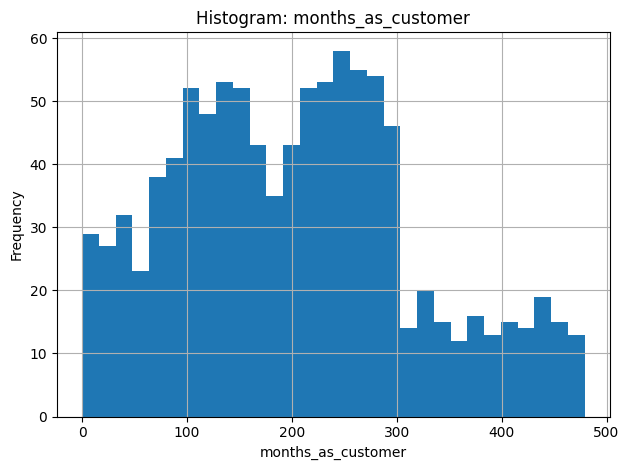

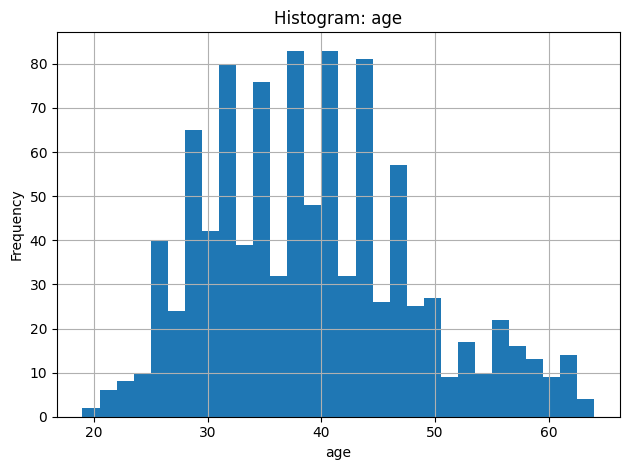

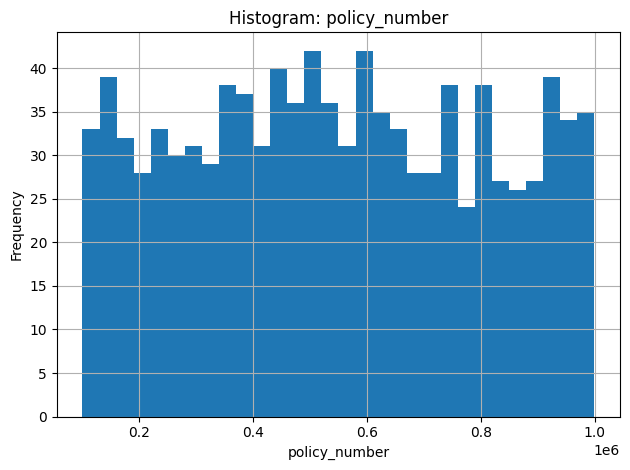

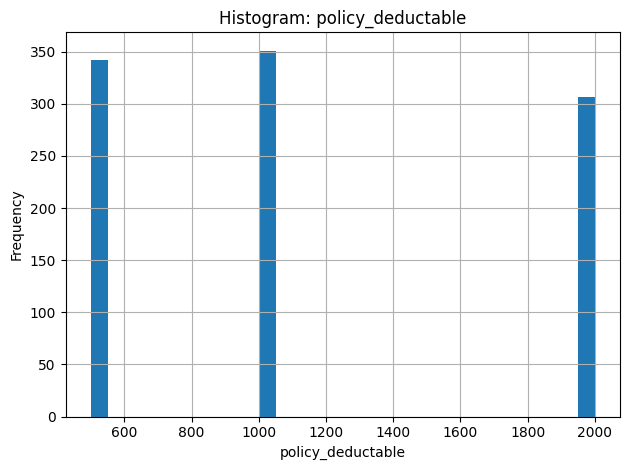

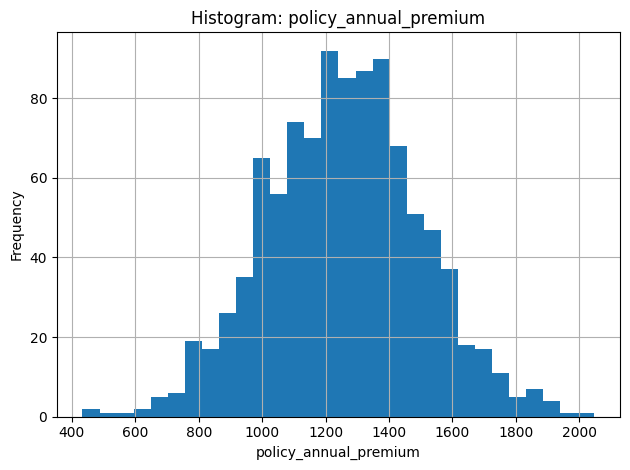

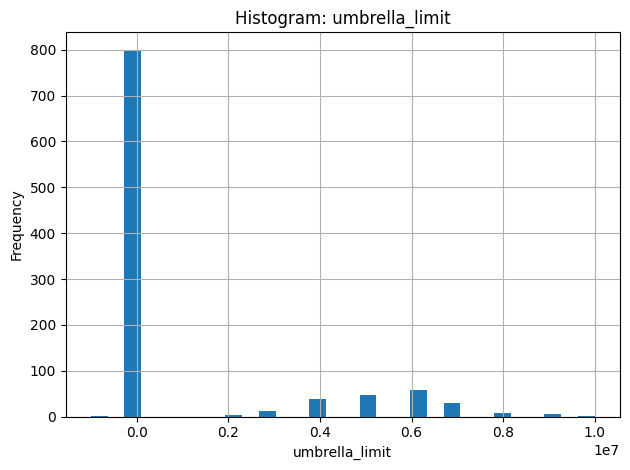

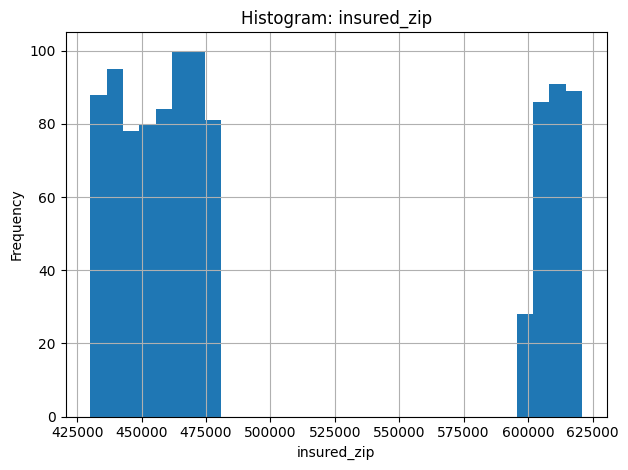

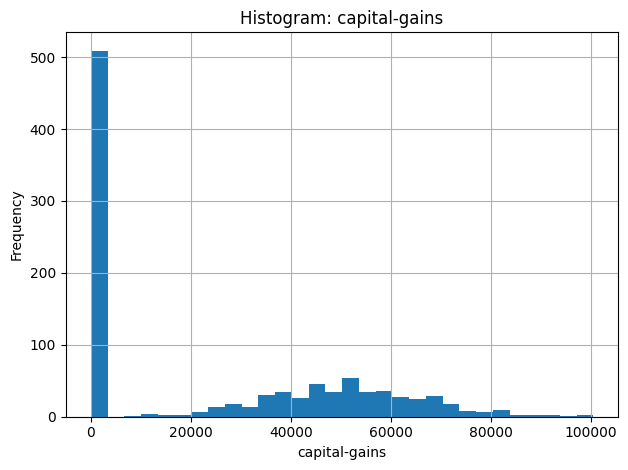

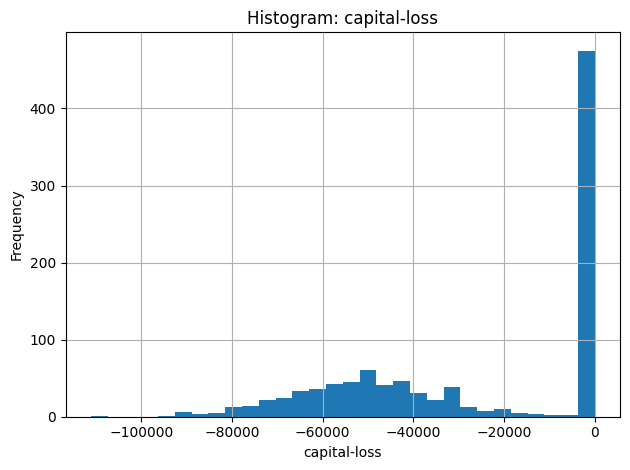

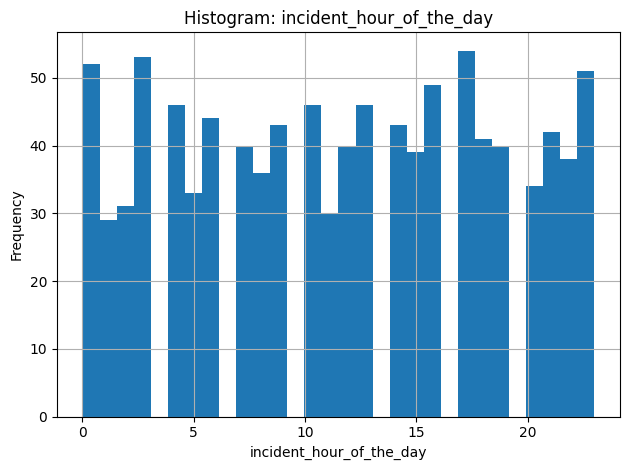

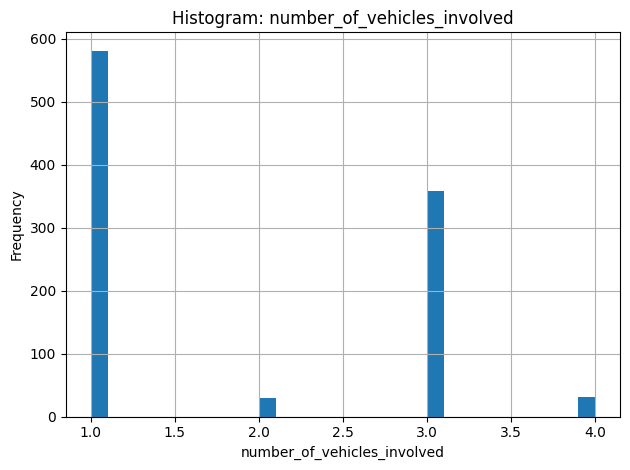

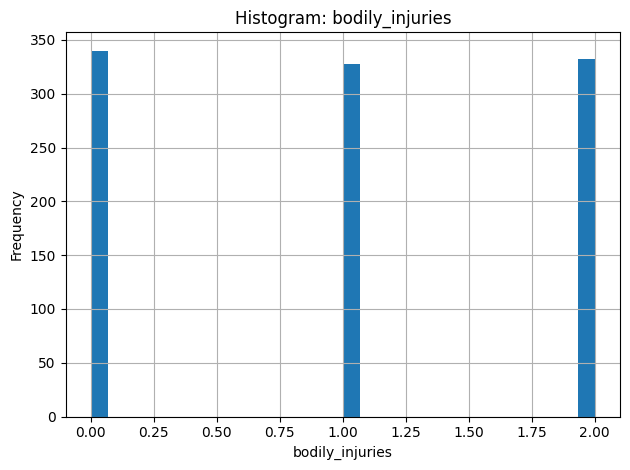

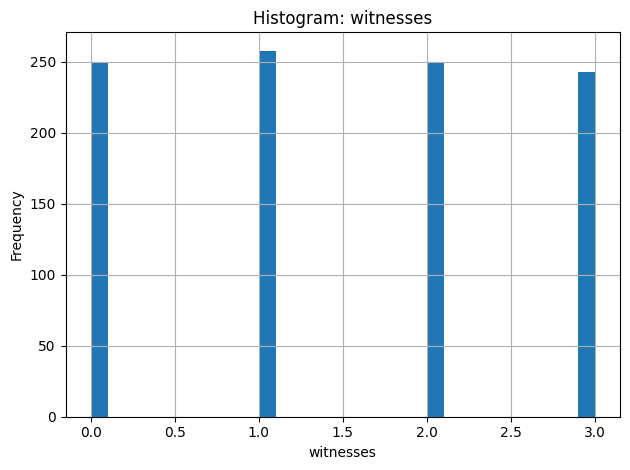

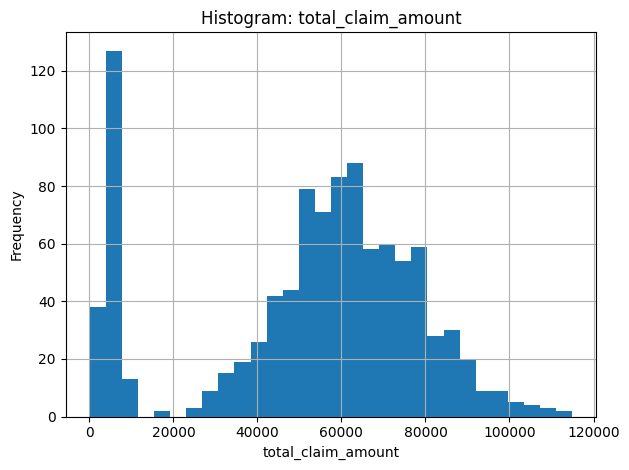

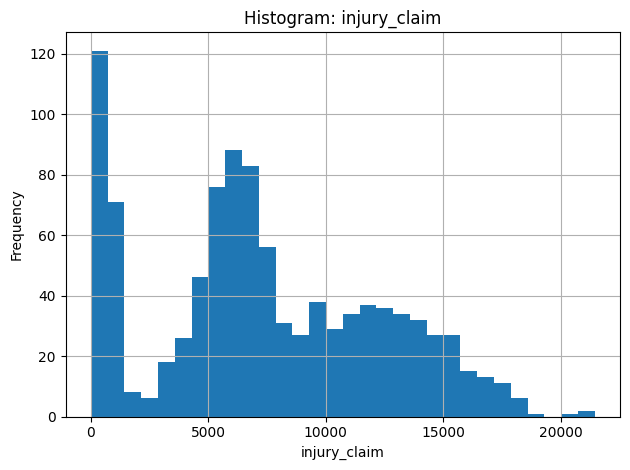

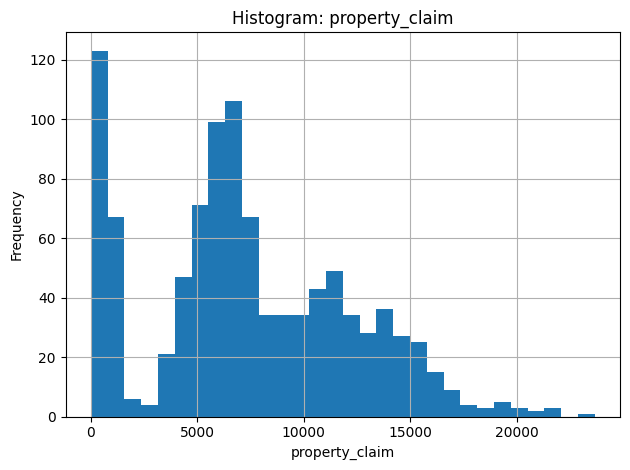

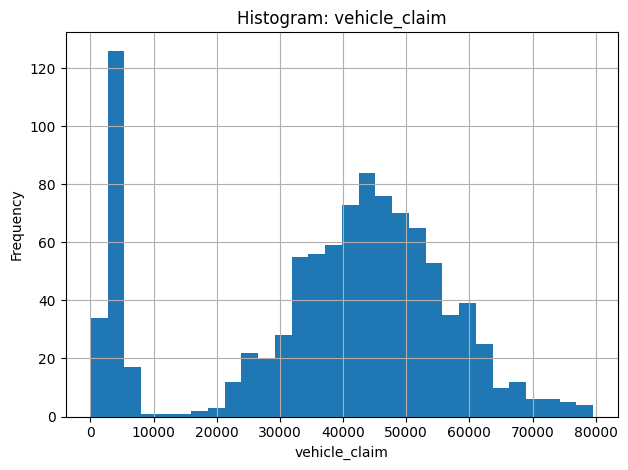

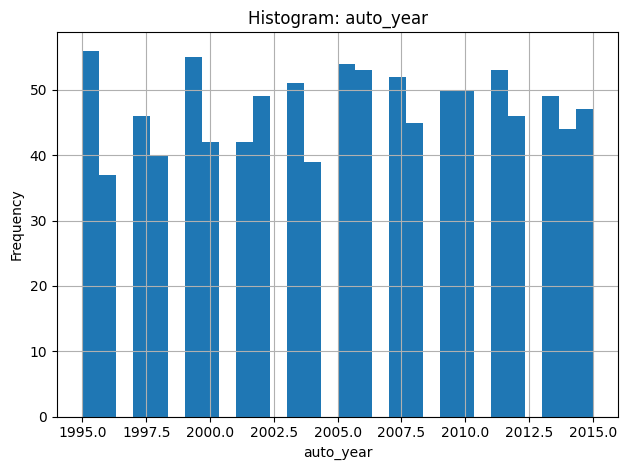

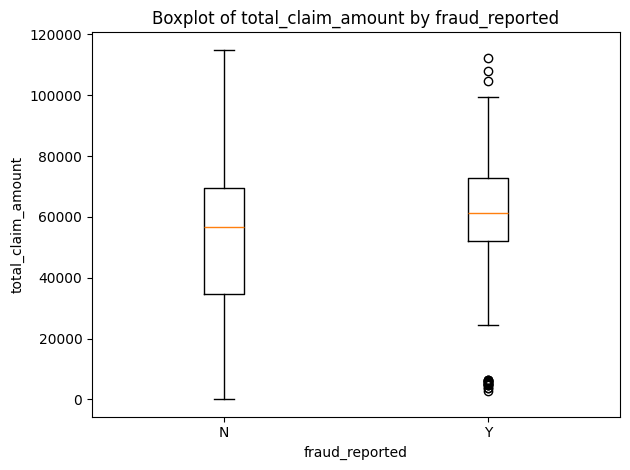

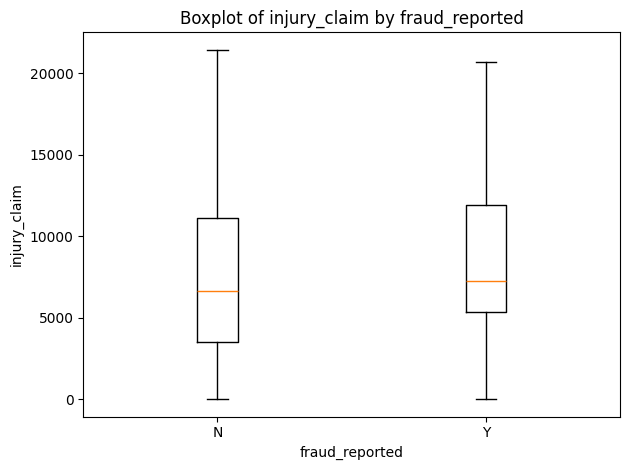

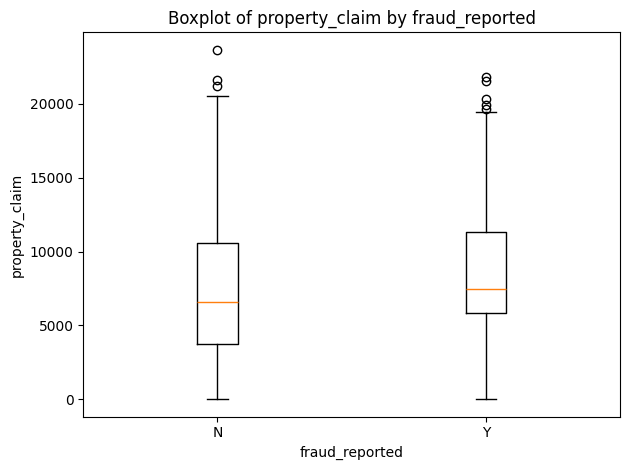

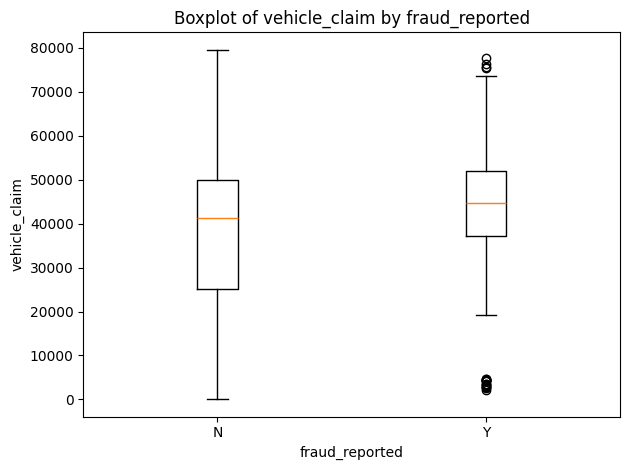

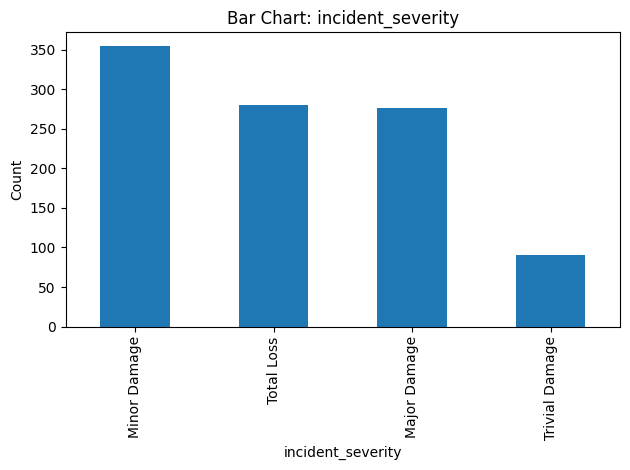

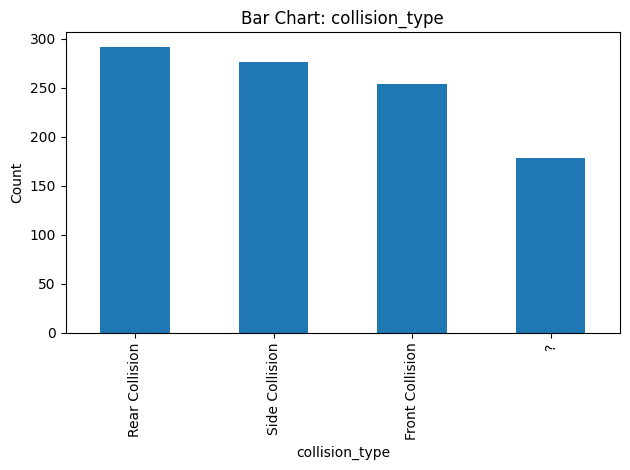

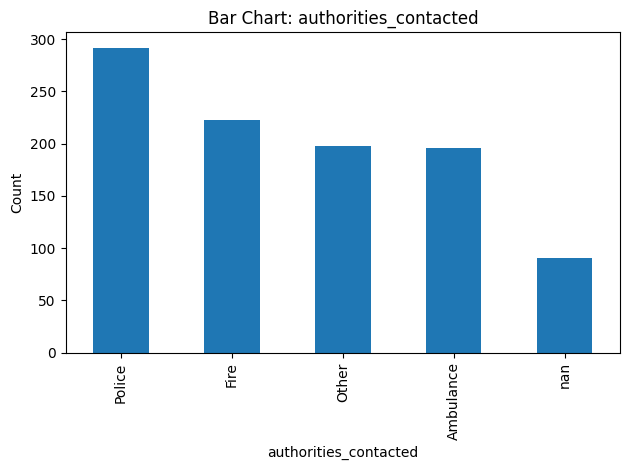

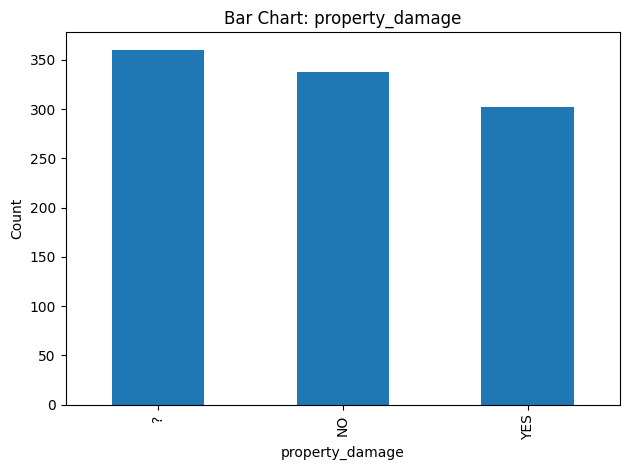

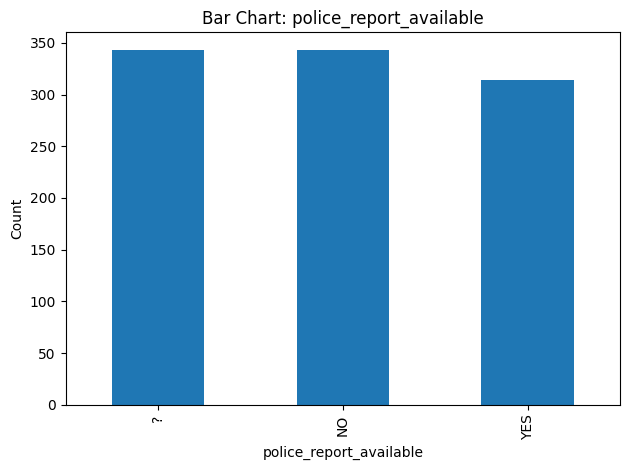

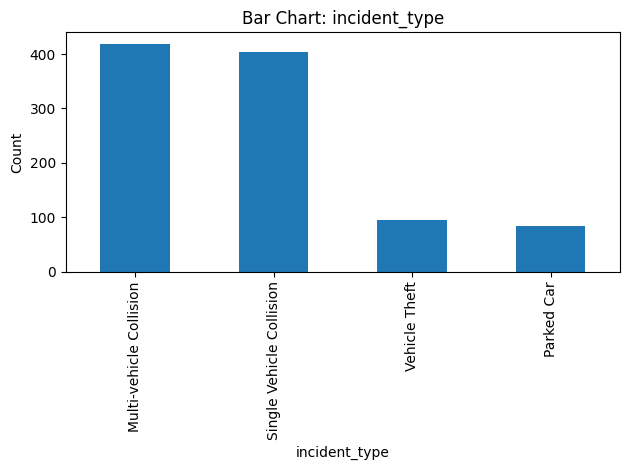

<Figure size 640x480 with 0 Axes>

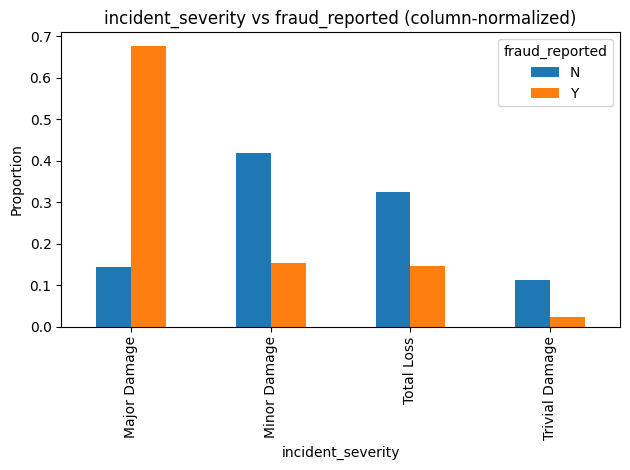

<Figure size 640x480 with 0 Axes>

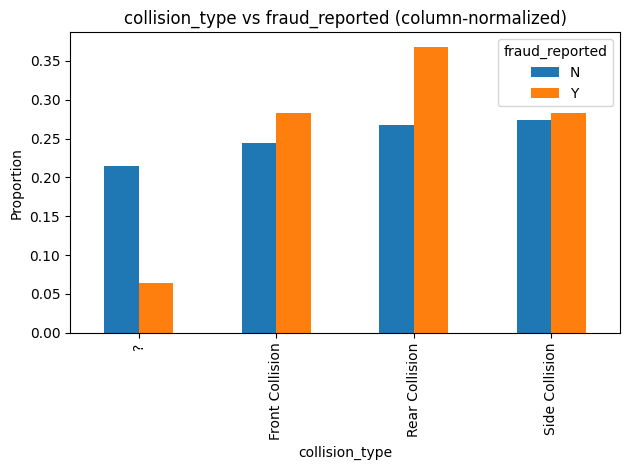

<Figure size 640x480 with 0 Axes>

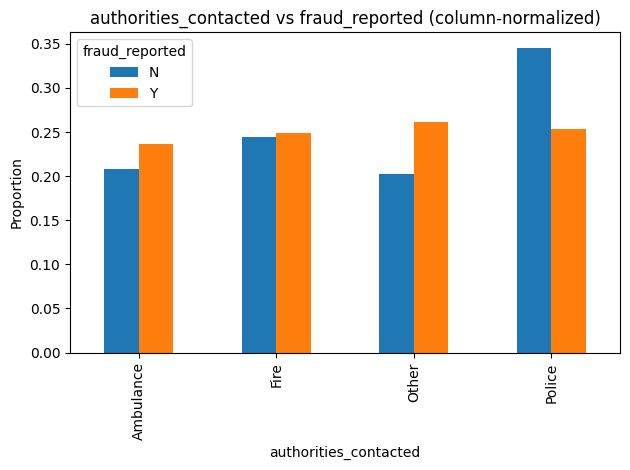

<Figure size 640x480 with 0 Axes>

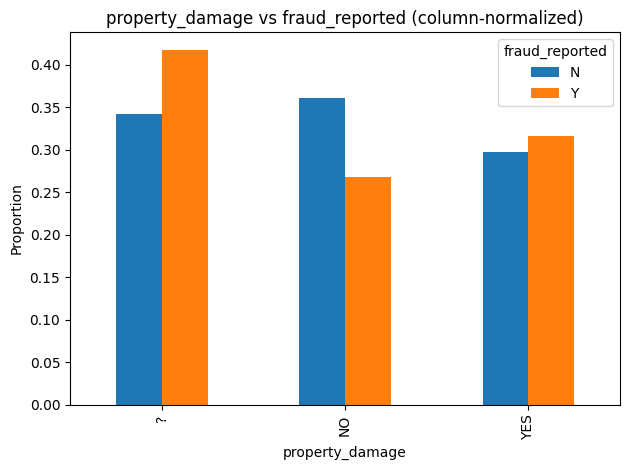

<Figure size 640x480 with 0 Axes>

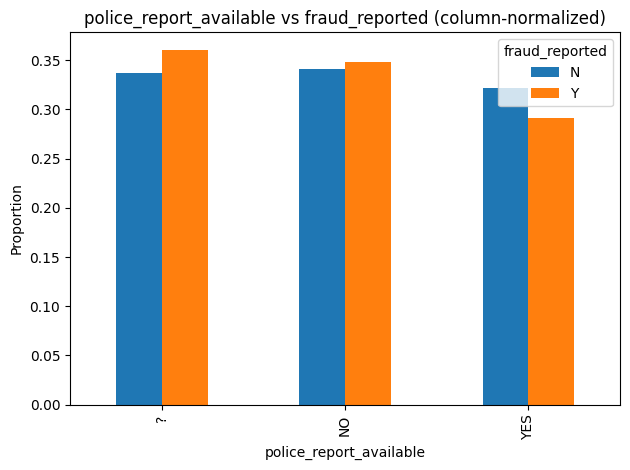

<Figure size 640x480 with 0 Axes>

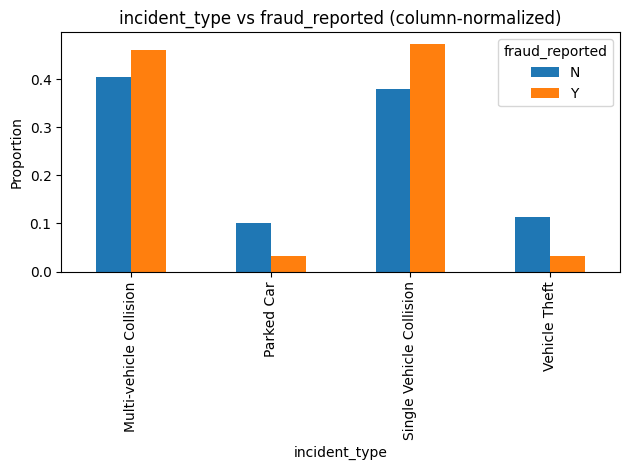

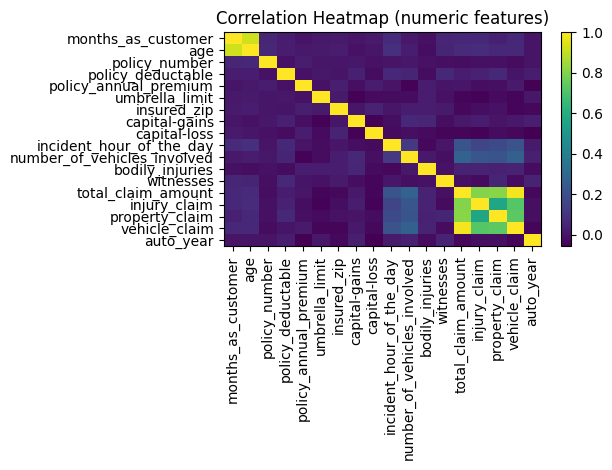

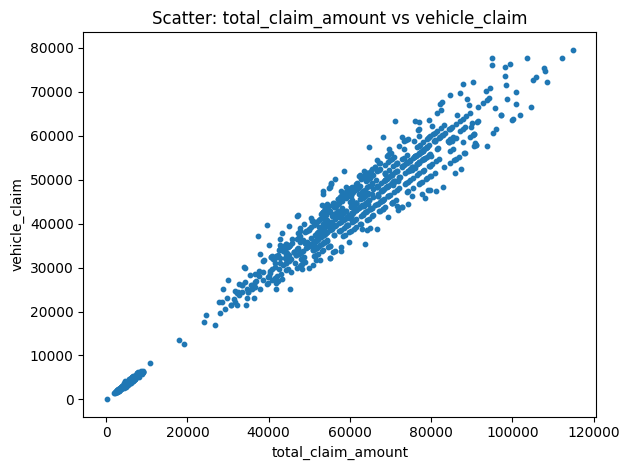

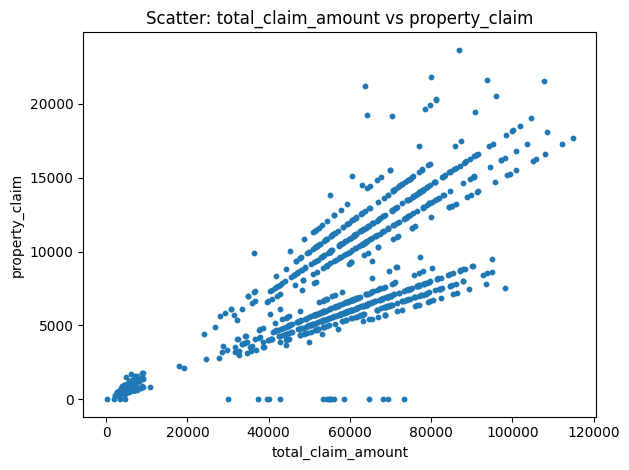

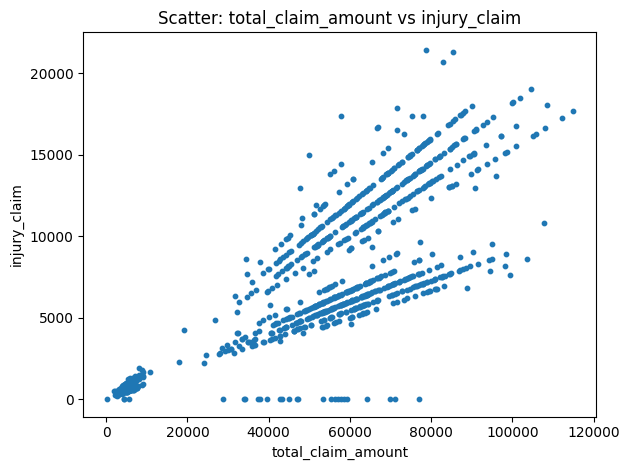

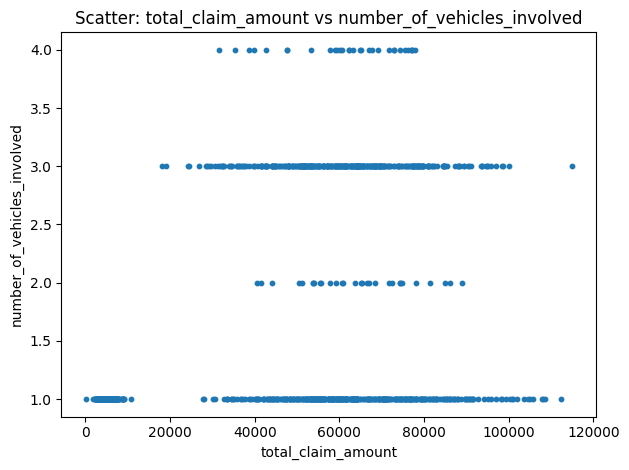


Group-wise means by fraud flag (selected numeric features):



total_claim_amount  injury_claim  property_claim  \
fraud_reported                                                     
N                         50288.61       7179.23         7018.88   
Y                         60302.11       8208.34         8560.12   

                vehicle_claim  witnesses  bodily_injuries  \
fraud_reported                                              
N                    36090.49       1.46             0.98   
Y                    43533.64       1.58             1.04   

                number_of_vehicles_involved  
fraud_reported                               
N                                      1.81  
Y                                      1.93


incident_severity vs fraud_reported (column-normalized):


fraud_reported        N     Y
incident_severity            
Major Damage       0.14  0.68
Minor Damage       0.42  0.15
Total Loss         0.32  0.15
Trivial Damage     0.11  0.02


collision_type vs fraud_reported (column-normalized):


fraud_reported      N     Y
collision_type             
?                0.22  0.06
Front Collision  0.24  0.28
Rear Collision   0.27  0.37
Side Collision   0.27  0.28


authorities_contacted vs fraud_reported (column-normalized):


fraud_reported            N     Y
authorities_contacted            
Ambulance              0.21  0.24
Fire                   0.24  0.25
Other                  0.20  0.26
Police                 0.35  0.25


property_damage vs fraud_reported (column-normalized):


fraud_reported      N     Y
property_damage            
?                0.34  0.42
NO               0.36  0.27
YES              0.30  0.32

In [8]:
# =========================
# Exploratory Data Analysis
# =========================

# Parse dates if helpful (not strictly required for plots below)
date_cols = ["policy_bind_date", "incident_date"]
for c in date_cols:
    if c in df.columns:
        try:
            df[c] = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
        except Exception:
            pass

print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum().sort_values(ascending=False))

# Class balance (if target present)
if target_col in df.columns:
    print("\nClass balance (fraud_reported):")
    print(df[target_col].value_counts(dropna=False))
    print("\nClass balance (%):")
    print((df[target_col].value_counts(normalize=True, dropna=False) * 100).round(2))

# -------------------------
# Summary statistics
# -------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [c for c in cat_cols if c not in [target_col]]  # exclude target from categorical list

print("\nNumerical summary statistics:")
display(df[numeric_cols].describe().T if len(numeric_cols) > 0 else "No numeric columns")

# -------------------------
# Histograms for numerical features
# -------------------------
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# -------------------------
# Boxplots of key claims by fraud label (if target present)
# -------------------------
key_claim_cols = [c for c in ["total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"] if c in df.columns]

if target_col in df.columns and len(key_claim_cols) > 0:
    for col in key_claim_cols:
        plt.figure()
        data_to_plot = [df.loc[df[target_col] == cls, col].dropna() for cls in sorted(df[target_col].unique())]
        plt.boxplot(data_to_plot, labels=sorted(df[target_col].unique()))
        plt.title(f"Boxplot of {col} by {target_col}")
        plt.xlabel(target_col)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# -------------------------
# Bar plots for selected categorical features
# -------------------------
# Choose a few high-signal categoricals common in this dataset if present:
selected_cats = [c for c in [
    "incident_severity", "collision_type", "authorities_contacted",
    "property_damage", "police_report_available", "incident_type"
] if c in df.columns]

for col in selected_cats:
    counts = df[col].value_counts(dropna=False).head(15)
    plt.figure()
    counts.plot(kind="bar")
    plt.title(f"Bar Chart: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# If target present, show normalized distribution of categories by target
if target_col in df.columns:
    for col in selected_cats:
        ct = pd.crosstab(df[col], df[target_col], normalize="columns")
        plt.figure()
        (ct.fillna(0).head(15)).plot(kind="bar")
        plt.title(f"{col} vs {target_col} (column-normalized)")
        plt.xlabel(col)
        plt.ylabel("Proportion")
        plt.tight_layout()
        plt.show()

# -------------------------
# Correlation matrix (numeric)
# -------------------------
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    
    plt.figure()
    plt.imshow(corr.values, aspect="auto")
    plt.title("Correlation Heatmap (numeric features)")
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# -------------------------
# A few scatter plots for top numeric relationships
# -------------------------
# Heuristic: pick up to 4 strong pairs involving total_claim_amount if present
pairs = []
if "total_claim_amount" in df.columns:
    # Compute correlations with total_claim_amount
    corr_target = df[numeric_cols].corrwith(df["total_claim_amount"]).abs().sort_values(ascending=False)
    # Skip itself and too-trivial duplicates
    top_partners = [c for c in corr_target.index if c != "total_claim_amount"][:4]
    pairs = [("total_claim_amount", c) for c in top_partners]

# If none, just fall back to a few arbitrary numeric pairs
if len(pairs) == 0 and len(numeric_cols) >= 2:
    pairs = [(numeric_cols[i], numeric_cols[i+1]) for i in range(min(4, len(numeric_cols)-1))]

for x, y in pairs:
    plt.figure()
    plt.scatter(df[x], df[y], s=10)
    plt.title(f"Scatter: {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# -------------------------
# Quick, text-based “findings” prompts you can adapt in your narrative
# -------------------------
if target_col in df.columns:
    print("\nGroup-wise means by fraud flag (selected numeric features):\n")
    group_cols = [c for c in key_claim_cols + ["witnesses", "bodily_injuries", "number_of_vehicles_involved"] if c in df.columns]
    display(df.groupby(target_col)[group_cols].mean().round(2))

    # Example categorical relationships
    for col in ["incident_severity", "collision_type", "authorities_contacted", "property_damage"]:
        if col in df.columns:
            print(f"\n{col} vs {target_col} (column-normalized):")
            display(pd.crosstab(df[col], df[target_col], normalize="columns").round(2))


### Exploratory Data Analysis – Key Findings

- **Class balance:**  
  `fraud_reported` is imbalanced (N ≈ 75.3%, Y ≈ 24.7%).

- **Claim amount relationships:**  
  - `total_claim_amount` has very high correlation with `vehicle_claim` (~0.98).  
  - Strong correlation also exists with `injury_claim` and `property_claim` (~0.81 each).

- **Fraud signal in severity:**  
  “Major Damage” appears far more frequently among fraud “Y” cases than “N”.  
  Other severities (Minor/Total/Trivial) are more common for “N”.

- **Fraud vs averages:**  
  On average, fraud “Y” cases have higher:
  - Total claim amounts  
  - Vehicle, property, and injury claims  
  - Slightly more witnesses and bodily injuries

- **Missingness:**  
  Column `_c39` is entirely missing → safe to drop.

- **Potential quirk:**  
  `months_as_customer` and `age` correlate unusually strongly (~0.92).  
  This may reflect data design rather than a true real-world relationship.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
